In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
path = 'https://stepik.org/media/attachments/lesson/384453/conversion.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [8]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [9]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [10]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [11]:
df.fb_campaign_id.nunique()

691

In [12]:
df_fb = df \
    .groupby('fb_campaign_id', as_index = False) \
    .agg({'Impressions':'sum'})

In [14]:
df_fb['Impressions_log'] = np.log(df_fb.Impressions)

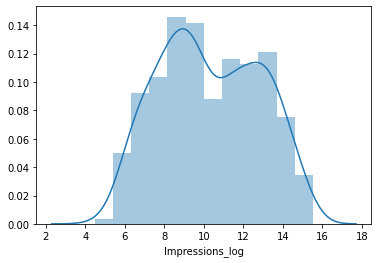

In [17]:
sns.distplot(df_fb.Impressions_log)

In [20]:
df2 = df.loc[:,['ad_id', 'Clicks', 'Impressions']]

In [29]:
df2 = df2.assign(CTR = df2.Clicks/df2.Impressions)

In [31]:
df2.idxmax()['CTR']

150

In [34]:
df.iloc[150]

ad_id                  738637
xyz_campaign_id           936
fb_campaign_id         109857
age                     45-49
gender                      F
interest                   24
Impressions               944
Clicks                      1
Spent                    1.42
Total_Conversion            1
Approved_Conversion         0
Name: 150, dtype: object

In [54]:
df_3 = df.loc[df['xyz_campaign_id'] == 916]

In [55]:
df_3 = df_3.assign(CTR = df_3.Clicks/df_3.Impressions)

In [56]:
df_3.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242


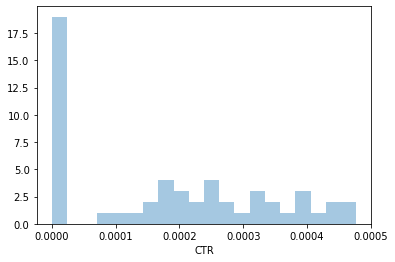

In [61]:
sns.distplot(df_3.CTR, kde = False, bins = 20)

In [62]:
df = df.assign(CPC = df.Spent/df.Clicks)

In [65]:
df.CPC.describe()['75%'] - df.CPC.describe()['25%']

0.25436369905

In [71]:
df_m = df.loc[df['gender']=='M'].dropna()

In [72]:
df_f = df.loc[df['gender']=='F'].dropna()

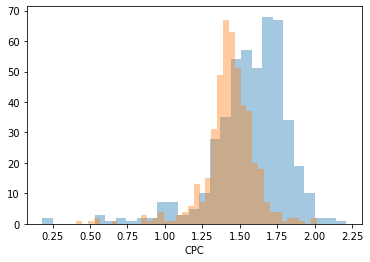

In [73]:
sns.distplot(df_m.CPC, kde = False)
sns.distplot(df_f.CPC, kde = False)

In [75]:
df_CR = df.assign(CR = df.Approved_Conversion /df.Clicks)

In [76]:
df_CR.loc[df_CR['ad_id']==1121814]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,CR
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,1.454394,0.030879
